<p align="right">
    <img src="Zewail-City.png">
</p>


---

# __Bonus Assignment :__

In [2]:
# Importing main libraries
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

<p align="center">
    <img src="1.png">
</p>

### Part (a): Linear system of equations:

### Method 1: Solving a Linear System of Equations (LSE):

To find the interpolating polynomial using a linear system of equations, we assume the polynomial is of the form:
$$
P(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3
$$

We need to determine the coefficients $ a_0, a_1, a_2, a_3 $ such that $ P(x_i) = y_i $ for each data point.

The system of equations is:
$$
\begin{aligned}
P(0) &= a_0 + a_1 \cdot 0 + a_2 \cdot 0^2 + a_3 \cdot 0^3 = 3, \\
P(5) &= a_0 + a_1 \cdot 5 + a_2 \cdot 5^2 + a_3 \cdot 5^3 = 8, \\
P(10) &= a_0 + a_1 \cdot 10 + a_2 \cdot 10^2 + a_3 \cdot 10^3 = -2, \\
P(15) &= a_0 + a_1 \cdot 15 + a_2 \cdot 15^2 + a_3 \cdot 15^3 = 9.
\end{aligned}
$$

This can be written in Vandermonde matrix form as:

$$
\mathbf{V} = 
\begin{bmatrix}
1 & x_0 & x_0^2 & x_0^3 \\
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
1 & x_3 & x_3^2 & x_3^3 \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0^2 & 0^3 \\
1 & 5 & 5^2 & 5^3 \\
1 & 10 & 10^2 & 10^3 \\
1 & 15 & 15^2 & 15^3 \\
\end{bmatrix}
$$
Therefore;
$$
\begin{bmatrix}
1 & 0 & 0 & 0 \\
1 & 5 & 25 & 125 \\
1 & 10 & 100 & 1000 \\
1 & 15 & 225 & 3375 \\
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
a_3 \\
\end{bmatrix}
=
\begin{bmatrix}
3 \\
8 \\
-2 \\
9 \\
\end{bmatrix}
$$

In [6]:
# defining data in arrays
x = np.array([0, 5, 10, 15])
y = np.array([3, 8, -2, 9])

In [7]:
# Construct Vandermonde matrix 
V = np.vander(x, increasing=True)

# Solve linear system
a = np.linalg.solve(V, y)

In [8]:
# Display coefficients
print("Coefficients [a0, a1, a2, a3]:", a)

Coefficients [a0, a1, a2, a3]: [ 3.     4.9   -1.02   0.048]


In [9]:
# interpolating function
def P(x_val):
    return a[0] + a[1]*x_val + a[2]*x_val**2 + a[3]*x_val**3

#### plotting:
Below are four plots of the interpolating polynomial $ P(x) $ obtained via linear system, evaluated over different ranges:

In [11]:
# Define x ranges
x_ranges = [
    (0, 15),
    (0, 20),
    (0, 5),
    (10, 15)
]
titles = [
    "Full Data Range [0, 15]",
    "Slight Extrapolation [0, 20]",
    "Zoom on First Segment [0, 5]",
    "Zoom on Last Segment [10, 15]"
]

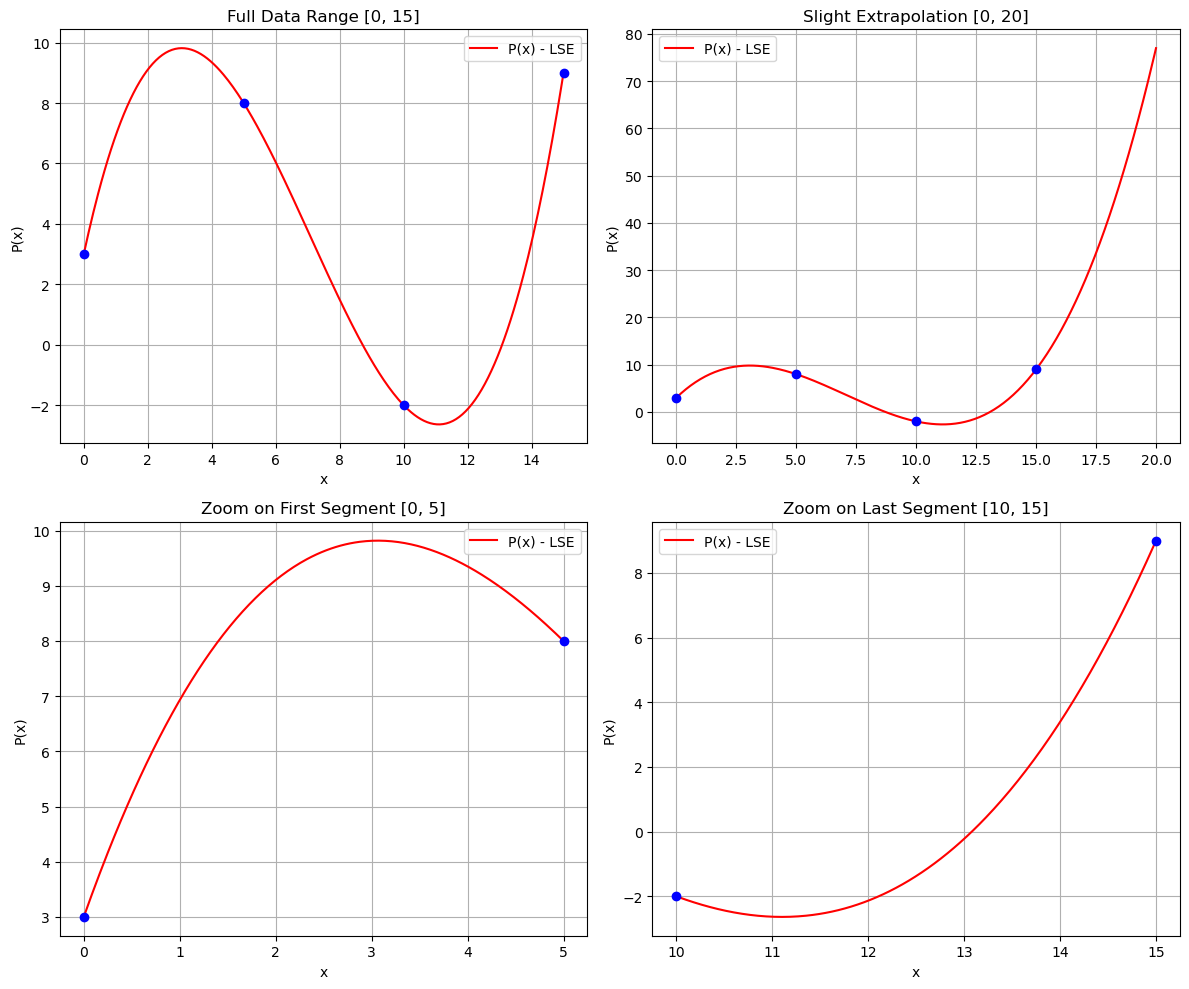

In [12]:
# Generate x values for each range
x_values = [np.linspace(start, end, 300) for start, end in x_ranges]

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, x_, title in zip(axs.flatten(), x_values, titles):
    y_ = P(x_)
    ax.plot(x_, y_, '-', color='red', label="P(x) - LSE")
    # Plot original data points only if they fall within current range
    for xi, yi in zip(x, y):
        if min(x_) <= xi <= max(x_):
            ax.scatter(xi, yi, color='blue', zorder=5)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("P(x)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

### Part (b): Lagrange Interpolation:

### Method 2: Lagrange Interpolation Formula

The Lagrange interpolation formula for a set of data points $ (x_i, y_i) $ is given by:
$$
P(x) = \sum_{i=0}^{n} y_i \ell_i(x)
$$
where
$$
\ell_i(x) = \prod_{\substack{0 \leq j \leq n \\ j \neq i}} \frac{x - x_j}{x_i - x_j}.
$$

For our data points, $ n = 3 $, and the Lagrange basis polynomials are:
$$
\begin{aligned}
\ell_0(x) &= \frac{(x - 5)(x - 10)(x - 15)}{(0 - 5)(0 - 10)(0 - 15)}, \\
\ell_1(x) &= \frac{(x - 0)(x - 10)(x - 15)}{(5 - 0)(5 - 10)(5 - 15)}, \\
\ell_2(x) &= \frac{(x - 0)(x - 5)(x - 15)}{(10 - 0)(10 - 5)(10 - 15)}, \\
\ell_3(x) &= \frac{(x - 0)(x - 5)(x - 10)}{(15 - 0)(15 - 5)(15 - 10)}.
\end{aligned}
$$

The interpolating polynomial is then:
$$
P(x) = 3 \ell_0(x) + 8 \ell_1(x) - 2 \ell_2(x) + 9 \ell_3(x).
$$

In [15]:
# Lagrange basis functions
def lagrange_basis(i, x_n, x):
    basis = 1.0
    for j in range(len(x)):
        if i != j:
            basis *= (x_n - x[j]) / (x[i] - x[j])
    return basis

In [16]:
# Lagrange interpolation function
def lagrange_interpolate(x_n, x, y):
    result = 0.0
    for i in range(len(x)):
        result += y[i] * lagrange_basis(i, x_n, x)
    return result

#### plotting:
Below are four plots of the interpolating polynomial $ P(x) $ obtained via **Lagrange interpolation**, evaluated over different ranges:

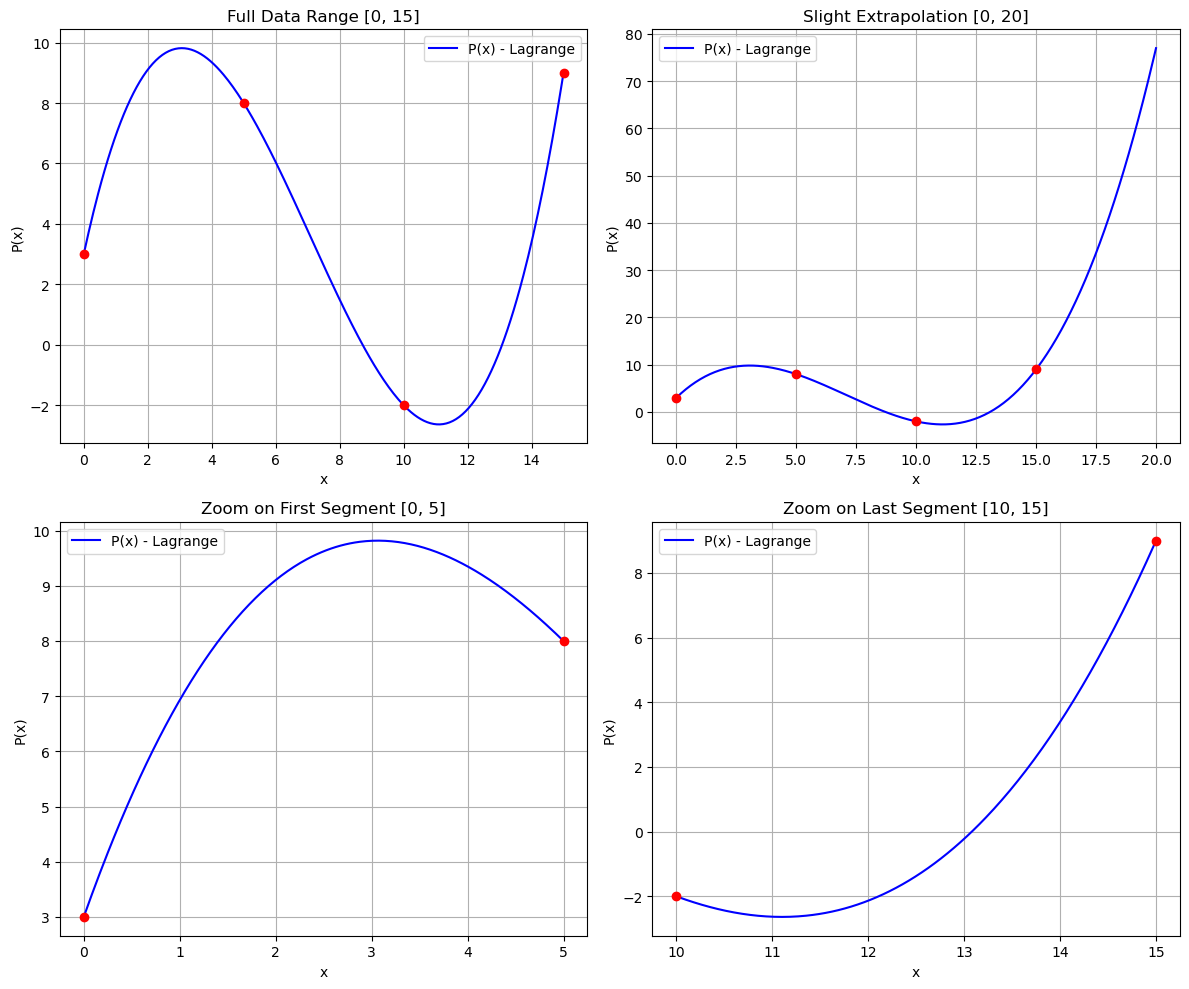

In [18]:
# Generate x values for each range
x_values = [np.linspace(start, end, 300) for start, end in x_ranges]

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, x_, title in zip(axs.flatten(), x_values, titles):
    y_ = np.array([lagrange_interpolate(xi, x, y) for xi in x_])
    ax.plot(x_, y_, '-', color='blue', label="P(x) - Lagrange")
    # Plot original data points only if within current range
    for xi, yi in zip(x, y):
        if min(x_) <= xi <= max(x_):
            ax.scatter(xi, yi, color='red', zorder=5)
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("P(x)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

### Extra part(c): 
### Comparing both:

#### Symbolic and Graphical Comparison of Interpolation Methods
We will:
- Use `sympy` to symbolically compute the interpolating polynomial via:
  - **Linear System (Vandermonde matrix)**
  - **Lagrange interpolation**
- Compare the resulting expressions
- Plot both polynomials on the same graph

In [20]:
# Define symbolic variable
x_sym = sp.Symbol('x')

In [21]:
# Method 1: Linear System (Vandermonde matrix + solve)
def symbolic_linear_system(x_vals, y_vals):
    A = sp.Matrix(np.vander(x_vals, len(x_vals), increasing=True))
    coeffs = sp.symbols('a0:%d' % len(x_vals))
    sol = sp.solve(A * sp.Matrix(coeffs) - sp.Matrix(y_vals), coeffs)
    poly = sum(sol[coeffs[i]] * x_sym**i for i in range(len(x_vals)))
    return sp.simplify(poly)

In [22]:
# Method 2: Lagrange Interpolation
def symbolic_lagrange(x_vals, y_vals):
    n = len(x_vals)
    P = 0
    for i in range(n):
        Li_num = 1
        Li_den = 1
        for j in range(n):
            if i != j:
                Li_num *= (x_sym - x_vals[j])
                Li_den *= (x_vals[i] - x_vals[j])
        Li = Li_num / Li_den
        P += y_vals[i] * Li
    return sp.simplify(P)

In [23]:
# Compute symbolic polynomials
P_lin = symbolic_linear_system(x, y)
P_lag = symbolic_lagrange(x, y)

In [24]:
# Print results
print("Polynomial from Linear System:")
P_lin

Polynomial from Linear System:


6*x**3/125 - 51*x**2/50 + 49*x/10 + 3

In [25]:
print("\nPolynomial from Lagrange Interpolation:")
P_lag


Polynomial from Lagrange Interpolation:


6*x**3/125 - 51*x**2/50 + 49*x/10 + 3

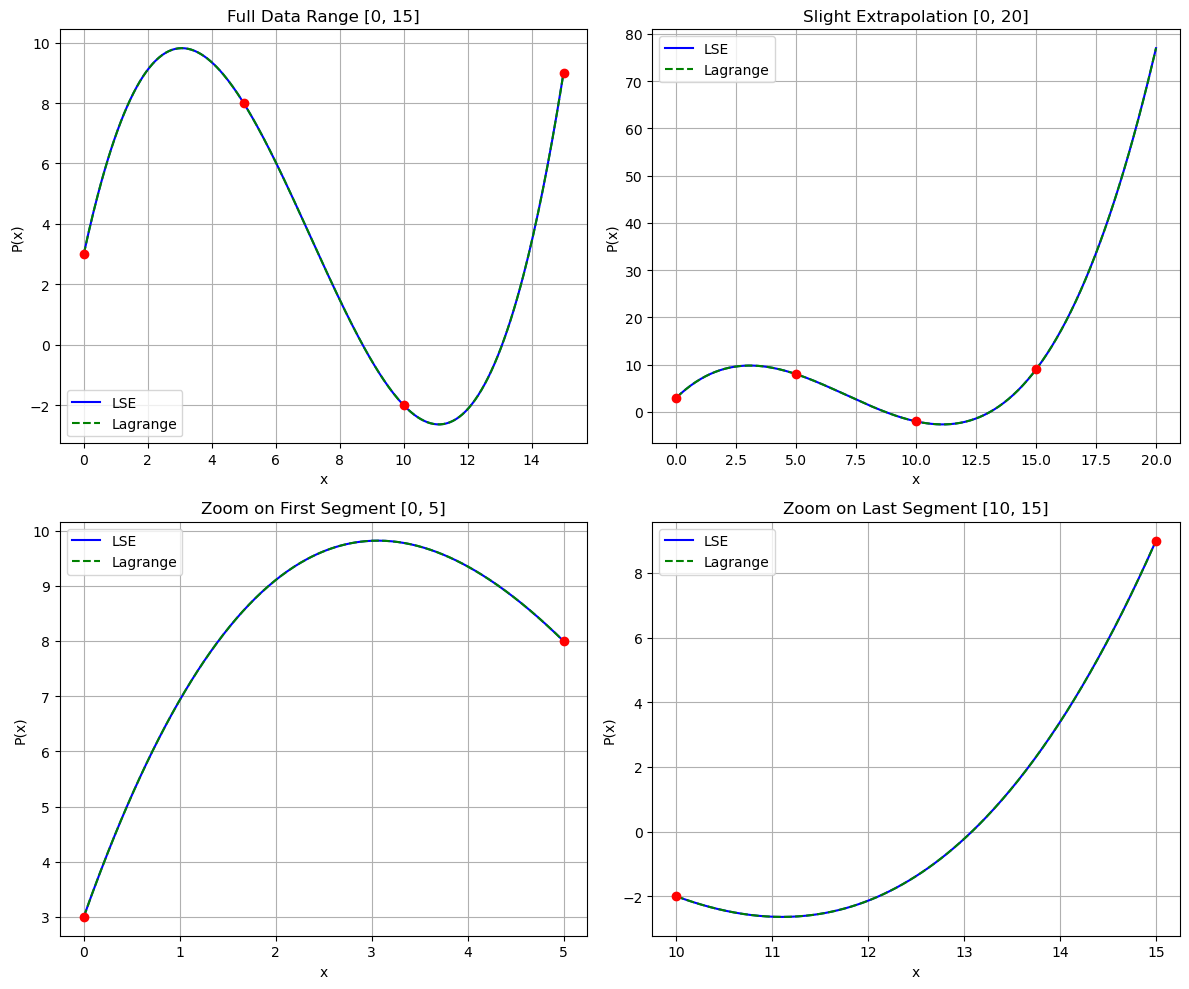

In [26]:
# Convert to lambda functions for plotting
P_lin_func = sp.lambdify(x_sym, P_lin, modules='numpy')
P_lag_func = sp.lambdify(x_sym, P_lag, modules='numpy')


# Generate x values for each range
x_values = [np.linspace(start, end, 300) for start, end in x_ranges]

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, x_, title in zip(axs.flatten(), x_values, titles):
    y_lin = P_lin_func(x_)
    y_lag = P_lag_func(x_)
    
    ax.plot(x_, y_lin, '-', label="LSE", color='blue')
    ax.plot(x_, y_lag, '--', label="Lagrange", color='green')
    
    # Plot original data points only if within current range
    for xi, yi in zip(x, y):
        if min(x_) <= xi <= max(x_):
            ax.scatter(xi, yi, color='red', zorder=5)
    
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("P(x)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

---
---

<p align="center">
    <img src="2.png">
</p>

### Part(1):
Develop a numerical differencing scheme that is $\mathcal{O}(h^8)$ for the first derivative $\dfrac{df(x)}{dx}$

We construct a centered finite difference scheme using 9 equally spaced points:  
$x - 4h$, $x - 3h$, ..., $x + 4h$.

We approximate $f'(x)$ using:

$$
f'(x) \approx \frac{1}{h} \sum_{k=-4}^{4} c_k f(x + kh)
$$

To derive the coefficients $c_k$, we expand each term using Taylor series:

$$
f(x + kh) = f(x) + kh f'(x) + \frac{(kh)^2}{2!} f''(x) + \cdots + \frac{(kh)^8}{8!} f^{(8)}(x) + \mathcal{O}(h^9)
$$

We then solve a system to ensure that:

- The $f(x)$ term cancels out
- The $f''(x)$, $f'''(x)$, ..., $f^{(7)}(x)$ terms cancel out
- Only $f'(x)$ remains with correct scaling
- The error term is $\mathcal{O}(h^8)$

The resulting 8th-order centered finite difference formula is:

$$
f'(x) \approx \frac{1}{280h} \left( -4f(x-4h) + 28f(x-3h) - 168f(x-2h) + 672f(x-h) - 672f(x+h) + 168f(x+2h) - 28f(x+3h) + 4f(x+4h) \right)
$$

This scheme is accurate to $\boxed{\mathcal{O}(h^8)}$.


### Part(2):
For a function $f(x,y)$, develop a consistent approximation to the mixed derivative $\dfrac{\partial^3 f}{\partial x^2 \partial y}$.

We apply the second-order central difference in $x$ to the first derivative in $y$:

$$
\frac{\partial^3 f}{\partial x^2 \partial y} \approx \frac{1}{\Delta x^2 \Delta y} \left[
f(x+\Delta x, y+\Delta y) - 2f(x, y+\Delta y) + f(x-\Delta x, y+\Delta y)
\right.
$$
$$
\left.
- f(x+\Delta x, y-\Delta y) + 2f(x, y-\Delta y) - f(x-\Delta x, y-\Delta y)
\right]
$$

This formula uses symmetric stencils in both $x$ and $y$, and is accurate to:

$$
\boxed{\mathcal{O}(\Delta x^2, \Delta y^2)}
$$


---
---

<p align="center">
    <img src="3.png">
</p>

We solve the 2D Laplace equation:

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0
$$

over the domain $0 < x < 1$, $0 < y < 1$ with boundary conditions:

- $ u(x,1) = 2 $
- $ u(1,y) = 2 $
- $ u(x,0) = 1 $
- $ u(0,y) = 0 $

We discretize the domain using a uniform grid and apply **Jacobi iteration** to solve the resulting linear system.

Finite Difference Discretization:

Using a 5-point stencil:

$$
u_{i,j} = \frac{1}{4} \left(u_{i+1,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} \right)
$$

Grid Settings:

We solve using:

1. $ \Delta x = \Delta y = \frac{1}{3} $ ⟶ $N = 3$
2. $ \Delta x = \Delta y = \frac{1}{6} $ ⟶ $N = 6$

The number of interior points is $(N-1)^2$.

Numerical Method: Jacobi Iteration:

We initialize the solution grid using boundary conditions and iterate until convergence:

$$
u_{i,j}^{(k+1)} = \frac{1}{4} \left(u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)} \right)
$$

Convergence is checked by the maximum change between iterations.


In [36]:
# Main function
def solve_laplace_jacobi(N, tol=1e-4, max_iter=10000):
    h = 1.0 / N
    u = np.zeros((N+1, N+1))

    # Boundary conditions
    u[:, 0] = 1             # Bottom (y = 0)
    u[:, -1] = 2            # Top (y = 1)
    u[0, :] = 0             # Left (x = 0)
    u[-1, :] = 2            # Right (x = 1)

    u_new = u.copy()
    for iteration in range(max_iter):
        for i in range(1, N):
            for j in range(1, N):
                u_new[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
        
        error = np.max(np.abs(u_new - u))
        u[:] = u_new
        if error < tol:
            print(f"Converged after {iteration} iterations")
            break
    else:
        print("Did not converge")

    return u


In [37]:
def plot_solution(u, title):
    N = u.shape[0] - 1
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(12, 5))

    # Subplot 1: 3D surface plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, u.T, cmap='viridis')
    ax1.set_title(f"{title} (3D Surface)")
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('u(x, y)')

    # Subplot 2: 2D contour plot
    ax2 = fig.add_subplot(1, 2, 2)
    contour = ax2.contourf(X, Y, u.T, 20, cmap='viridis')
    fig.colorbar(contour, ax=ax2)
    ax2.set_title(f"{title} (2D Contour)")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    plt.tight_layout()
    plt.show()


Converged after 13 iterations


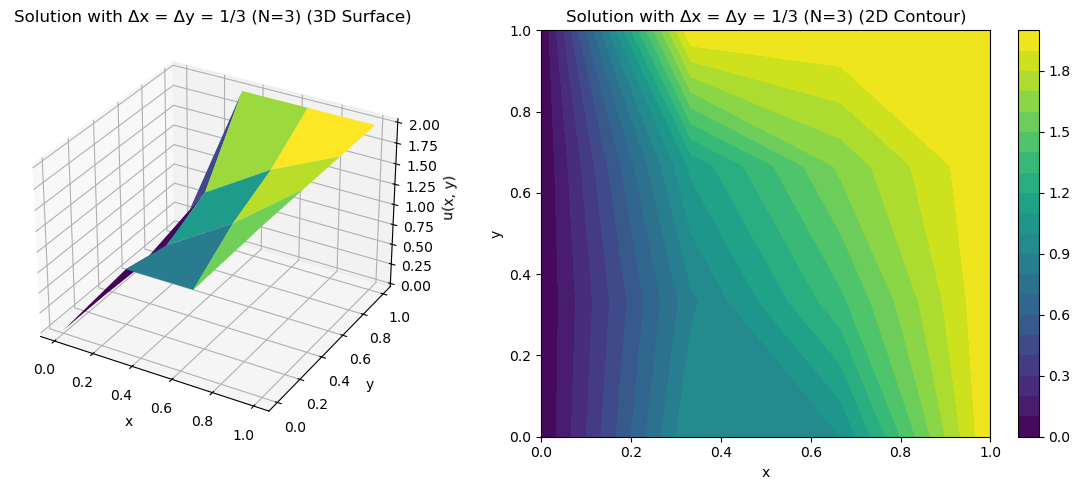

In [38]:
# Case a) Δx = Δy = 1/3 → N = 3
u3 = solve_laplace_jacobi(N=3)
plot_solution(u3, 'Solution with Δx = Δy = 1/3 (N=3)')

Converged after 55 iterations


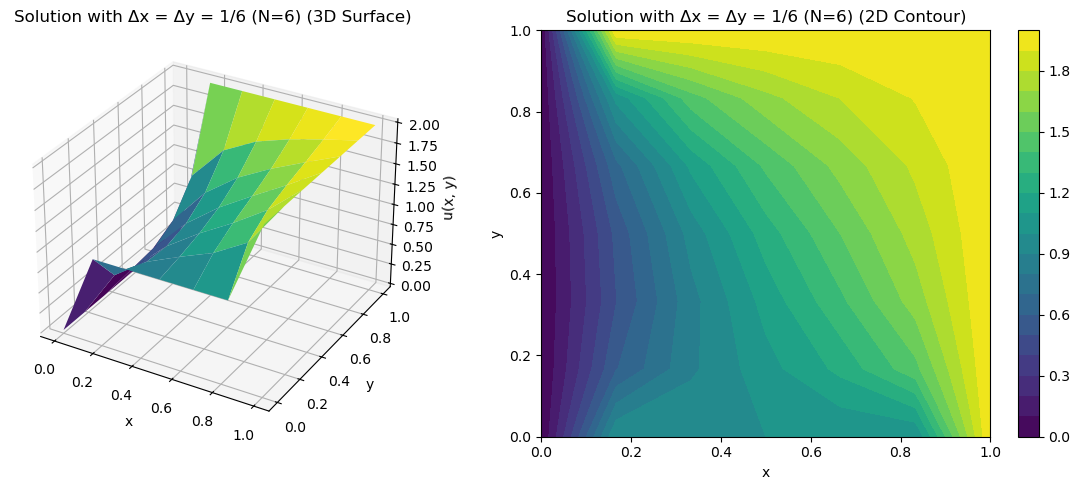

In [39]:
# Case b) Δx = Δy = 1/6 → N = 6
u6 = solve_laplace_jacobi(N=6)
plot_solution(u6, 'Solution with Δx = Δy = 1/6 (N=6)')

---
---

<p align="center">
    <img src="4.png">
</p>

We aim to demonstrate that the **Gauss-Seidel iteration** for solving a linear system:

$$
Ax = b
$$

converges for any initial guess $ x^{(0)} $ provided that the matrix $ A $ is **strictly diagonally dominant**.

Matrix Decomposition:

Let the matrix $ A \in \mathbb{R}^{n \times n} $ be decomposed as:

$$
A = D + L + U
$$

where:
- $ D $ is the diagonal component of $ A $,
- $ L $ is the strict lower triangular component,
- $ U $ is the strict upper triangular component.

The Gauss-Seidel iterative method is then given by:

$$
x^{(k+1)} = -(D + L)^{-1} U x^{(k)} + (D + L)^{-1} b
$$

Thus, the associated **iteration matrix** is:

$$
G_{\text{GS}} = -(D + L)^{-1} U
$$

Convergence Criterion:

The convergence of the Gauss-Seidel method is guaranteed if the **spectral radius** of the iteration matrix satisfies:

$$
\rho(G_{\text{GS}}) < 1
$$

Under this condition, the error in the iterates decays exponentially, ensuring convergence to the true solution.

Strict Diagonal Dominance:

A matrix $ A $ is said to be **strictly diagonally dominant** if:

$$
|a_{ii}| > \sum_{j \ne i} |a_{ij}|, \quad \text{for all } i = 1, \dots, n
$$

This condition implies that the diagonal elements of the matrix dominate the sum of the absolute values of the off-diagonal elements in each row.

Convergence Analysis:

Let $ x^\ast $ denote the exact solution to the system, and define the error vector at iteration $ k $ as:

$$
e^{(k)} = x^{(k)} - x^\ast
$$

Substituting into the iterative scheme yields:

$$
e^{(k+1)} = G_{\text{GS}} e^{(k)} = G_{\text{GS}}^k e^{(0)}
$$

If $ \rho(G_{\text{GS}}) < 1 $, then:

$$
\lim_{k \to \infty} G_{\text{GS}}^k = 0
\quad \Rightarrow \quad \lim_{k \to \infty} e^{(k)} = 0
\quad \Rightarrow \quad \lim_{k \to \infty} x^{(k)} = x^\ast
$$

It is a classical result in numerical linear algebra that if $ A $ is strictly diagonally dominant, then both the Jacobi and Gauss-Seidel iterative methods converge, with the Gauss-Seidel method typically exhibiting faster convergence.

Conclusion:

Under the assumption that $ A $ is strictly diagonally dominant, the iteration matrix $ G_{\text{GS}} $ satisfies $ \rho(G_{\text{GS}}) < 1 $, ensuring convergence of the Gauss-Seidel method from any arbitrary initial guess. The proof is thus complete.


---